Question 1: 

    https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8

Question 2: 

    1: detecting spam email
        Accuracy works well when the classes are balanced and the consequece for false positive and false negative is similar. For this example, the dataset is balanced and the detecting a spam email as a mail or detecting a email as spam when it is not both are not very serious errors.
        
    2: Identify if a patient has cancer
        Sensitivity should be used when the cost of false positive is big and that there are way more negative cases than positive ones and we do not want to miss any positive cases. This example fits well with sensitivity since missing a patient with cancer could result in heavy consequences and we want to find as many positive cases as possible to avoid the consequence.
        
    3: Medical test for rare diseases
        Specificity is important when the cost of false positive is much higher than the cost of false negative and it is essential to not overpredict positives. In this example, falsle positive would cost unnecessary stress and health expense for healthy patients.
    
    4: Search engine result
        Percision should be used if the consequence of false positive outweigh the cost of missing some positives, it focuses on the quality of positive predictions rather than quantity. In this example, it is crucial to show the users the correct result they search for, false positive would lower user satisfaction.
        
https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8



Question 3: 

In [4]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

ab_reduced = ab.drop(columns=['Weight_oz', 'Width', 'Height'])

ab_reduced_noNaN = ab_reduced.dropna().copy()

ab_reduced_noNaN['Pub year'] = ab_reduced_noNaN['Pub year'].astype(int)
ab_reduced_noNaN['NumPages'] = ab_reduced_noNaN['NumPages'].astype(int)
ab_reduced_noNaN['Hard_or_Paper'] = ab_reduced_noNaN['Hard_or_Paper'].astype('category')

print(ab_reduced_noNaN.info())

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, 0 to 324
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Title          319 non-null    object  
 1   Author         319 non-null    object  
 2   List Price     319 non-null    float64 
 3   Amazon Price   319 non-null    float64 
 4   Hard_or_Paper  319 non-null    category
 5   NumPages       319 non-null    int64   
 6   Publisher      319 non-null    object  
 7   Pub year       319 non-null    int64   
 8   ISBN-10        319 non-null    object  
 9   Thick          319 non-null    float64 
dtypes: category(1), float64(3), int64(2), object(4)
memory usage: 25.4+ KB
None


Question 4: 

In [7]:
from sklearn.model_selection import train_test_split

# Define X and y
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Perform 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output number of observations in each set
print(f"Training set size: {len(X_train)} observations")
print(f"Testing set size: {len(X_test)} observations")

Training set size: 255 observations
Testing set size: 64 observations


[Text(0.5, 0.8333333333333334, 'List Price <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.5, 'List Price <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.16666666666666666, 'gini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.375, 0.16666666666666666, 'gini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.75, 0.5, 'List Price <= 27.275\ngini = 0.475\nsamples = 72\nvalue = [28, 44]\nclass = Hardcover'),
 Text(0.625, 0.16666666666666666, 'gini = 0.39\nsamples = 49\nvalue = [13, 36]\nclass = Hardcover'),
 Text(0.875, 0.16666666666666666, 'gini = 0.454\nsamples = 23\nvalue = [15, 8]\nclass = Paperback')]

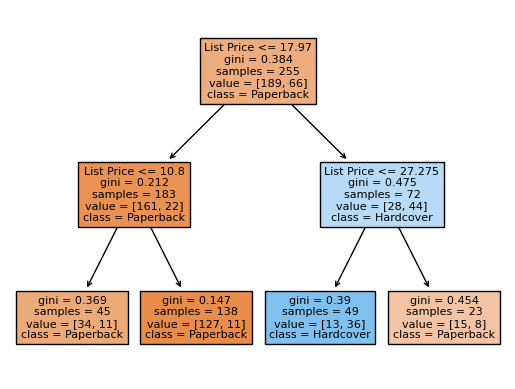

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Instantiate the classifier with max_depth=2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Visualize the tree
tree.plot_tree(clf, feature_names=['List Price'], class_names=['Paperback', 'Hardcover'], filled=True)


At the root node, the tree checks if the price is less than or equal to 17.97, and it splits into two branches. In the two branches, it checks if the left branche is less than or equal to 10.8 and if the right branche is less than or equal to 27.275 and each splits into two leaf node accordingly. In the leaf node, each leaf contains a prediction determined by the majority in the region(if most books in the range of x1 <= list price <= x2 are hardcover, then the model predicts hardcover for this range).

https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8

    

Question 5: 

[Text(0.5, 0.9, 'NumPages <= 17.97\ngini = 0.384\nsamples = 255\nvalue = [189, 66]\nclass = Paperback'),
 Text(0.25, 0.7, 'NumPages <= 10.8\ngini = 0.212\nsamples = 183\nvalue = [161, 22]\nclass = Paperback'),
 Text(0.125, 0.5, 'NumPages <= 7.86\ngini = 0.369\nsamples = 45\nvalue = [34, 11]\nclass = Paperback'),
 Text(0.0625, 0.3, 'NumPages <= 5.47\ngini = 0.111\nsamples = 17\nvalue = [16, 1]\nclass = Paperback'),
 Text(0.03125, 0.1, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Paperback'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]\nclass = Paperback'),
 Text(0.1875, 0.3, 'NumPages <= 7.97\ngini = 0.459\nsamples = 28\nvalue = [18, 10]\nclass = Paperback'),
 Text(0.15625, 0.1, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Hardcover'),
 Text(0.21875, 0.1, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]\nclass = Paperback'),
 Text(0.375, 0.5, 'NumPages <= 16.97\ngini = 0.147\nsamples = 138\nvalue = [127, 11]\nclass = Paperback'),
 Text(0.3125, 0.3, 'NumPages <

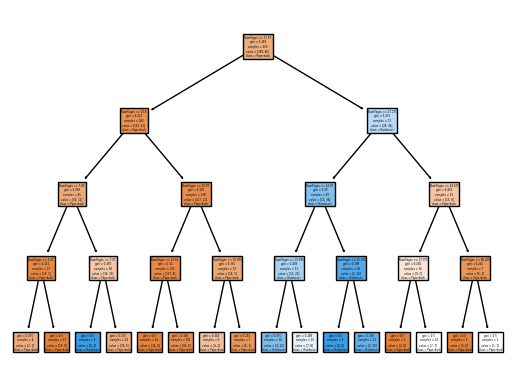

In [15]:
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']

clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X_train, y_train)

tree.plot_tree(clf2, feature_names=X.columns, class_names=['Paperback', 'Hardcover'], filled=True)

In this model, the tree first splits the dataset into two based on one feature, and in the subsequent splits, it considers other feature and splits the datasets based on that and continues until it reaches a depth of 4. After reaching depth 4, in the leaf node, the majority class in each leaf determines the prediction for books in that region.

https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8

Question 6: 

Metrics for clf: Sensitivity = 0.7, Specificity = 0.909, Accuracy = 0.844
Metrics for clf2: Sensitivity = 0.7, Specificity = 0.909, Accuracy = 0.844


Text(0.5, 1.0, 'Confusion Matrix for clf2')

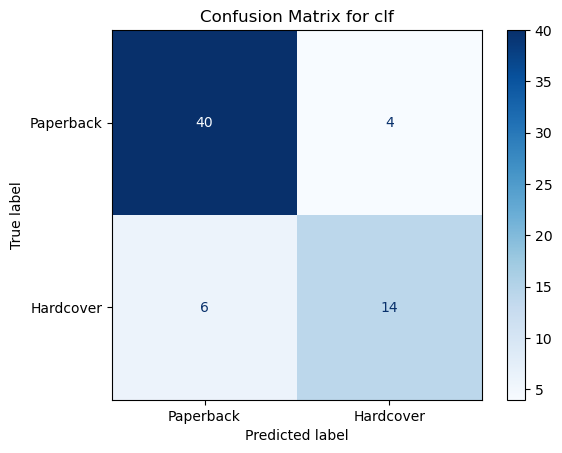

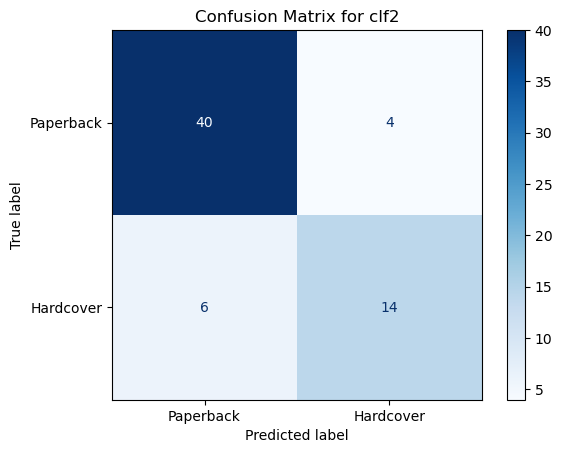

In [19]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predictions for clf and clf2 on the test set
y_pred_clf = clf.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)

# Confusion matrices
cm_clf = confusion_matrix(y_test, y_pred_clf)
cm_clf2 = confusion_matrix(y_test, y_pred_clf2)

# Sensitivity, Specificity, Accuracy Calculation Function
def calculate_metrics(cm):
    TN, FP, FN, TP = cm.ravel()
    sensitivity = TP / (TP + FN)  # Recall
    specificity = TN / (TN + FP)
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return np.round([sensitivity, specificity, accuracy], 3)

# Calculate metrics for clf and clf2
metrics_clf = calculate_metrics(cm_clf)
metrics_clf2 = calculate_metrics(cm_clf2)

# Print results
print(f"Metrics for clf: Sensitivity = {metrics_clf[0]}, Specificity = {metrics_clf[1]}, Accuracy = {metrics_clf[2]}")
print(f"Metrics for clf2: Sensitivity = {metrics_clf2[0]}, Specificity = {metrics_clf2[1]}, Accuracy = {metrics_clf2[2]}")

# Visualize Confusion Matrices
disp_clf = ConfusionMatrixDisplay(confusion_matrix=cm_clf, display_labels=['Paperback', 'Hardcover'])
disp_clf.plot(cmap='Blues')
disp_clf.ax_.set_title('Confusion Matrix for clf')

disp_clf2 = ConfusionMatrixDisplay(confusion_matrix=cm_clf2, display_labels=['Paperback', 'Hardcover'])
disp_clf2.plot(cmap='Blues')
disp_clf2.ax_.set_title('Confusion Matrix for clf2')


positive case: A book is hardcover.
negative case: A book is paperback.

True Negatives (TN): Correctly predicted paperback books.
False Positives (FP): Predicted hardcover, but is actually paperback.
False Negatives (FN): Predicted paperback, but is actually hardcover.
True Positives (TP): Correctly predicted hardcover books.

For both models, it correctly identifies 70% of the actual positive cases, 90.9% of the actual negative cases, and 84.4% of all test cases.

https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8

Question 7: 

    The difference between these two confusion matrix is that the first one is trained only on List Price while the second one is trained on NumPages, Thick, and List Price. Including additional features in the second model might allow it to capture more things in the data, which might lead to different prediction. The two confusion metrics above is better because it uses testing datasets for the evaluation of the data while these two evaluates their model using the train dataset. Using train dataset to evaluate a model might lead to overoptimistic results and overfitting.
    
https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8

Question 8：
https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8

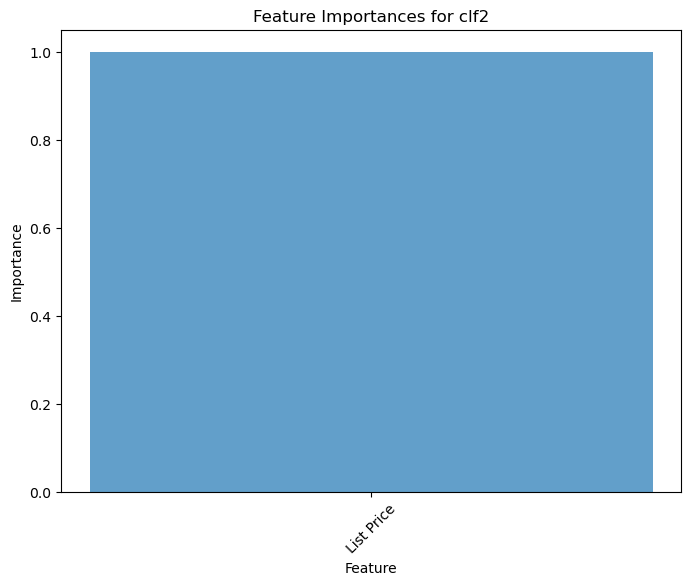

In [21]:
import matplotlib.pyplot as plt

# Extract feature importances and feature names
feature_importances = clf2.feature_importances_
feature_names = clf2.feature_names_in_

# Create a bar chart for feature importances
plt.figure(figsize=(8, 6))
plt.bar(feature_names, feature_importances, alpha=0.7)
plt.title('Feature Importances for clf2')
plt.ylabel('Importance')
plt.xlabel('Feature')
plt.xticks(rotation=45)
plt.show()


Question 9: 

    The difference is in the interpretability of the relationship between predictors and outcomes.
    In linear model regression, coefficients dirrectly quantifies the relationship between each predictor and the continuous outcome.
    In a decision tree, feature importances indicate the contribution of each predictor on improving the tree’s splitting criterion across all splits.
    linear regression offers a clear equation-like interpretation, while decision trees provide an importance ranking based on how features improve classification.
    
https://chatgpt.com/share/673b9048-e6e0-8001-9a12-d3a30c4531a8